# GROUP 20 FINAL Project - Kiva Crowdfunding

NAMES: Brittany Bishop, Tian Tian, Xinshuang Wang, Sally Zhang

## 1. Introduce our dataset

Identify and describe your dataset.
Identify dataset source.
Why is important and what appeals to you about it?
Acquire data and perform initial exploration to make sure it is suitable for dimensional modeling and analytical analysis
Describe the analytical questions you want to answer with the data. Minimum of 3 major questions are required
Describe any concerns with the data and changes you expect to overcome

Our dataset is data provided by a crowdfunding platform, Kiva.org, which serves to extend financial services to poor and underserved populations across the globe. The initial source for the data is Kaggle.com and the competition can be found here: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding. While the initial ask for the competition was interesting to our group, we thought the data itself was meaningful. We are curious to understand the general shape of this data: 
- How are the loans used? 
- Where in the world do these loans end up being dispersed? 
- How does the gender of the borrower(s) relate to the various other aspects of the loan? 

With those 3 exploratory questions in mind, we downloaded the data and began our assignment. While the initial dataset was fairly clean, we anticipated a some work related understanding the borrower gender and number of recipients on the loan. We also could tell that not all of the regional data was clean - this ended up with us focusing our analysis at the country level as opposed to a regional look.

## 2. Wrangle our dataset with Trifacta

### 2.1 Get our original dataset and explore it 

In [1]:
!wget -O kiva_loan.csv https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loans.csv

--2019-11-30 21:15:50--  https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loans.csv
Resolving gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com (gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com)... 52.219.96.136
Connecting to gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com (gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com)|52.219.96.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195852823 (187M) [text/csv]
Saving to: ‘kiva_loan.csv’

kiva_loan.csv       100%[===================>] 186.78M  13.1MB/s    in 14s     

2019-11-30 21:16:04 (13.3 MB/s) - ‘kiva_loan.csv’ saved [195852823/195852823]



In [2]:
# Count the rows of the dataset we chose
!wc -l kiva_loan.csv

672462 kiva_loan.csv


In [3]:
# Show the column name 
!xsv headers kiva_loan.csv

1   id
2   funded_amount
3   loan_amount
4   activity
5   sector
6   use
7   country_code
8   country
9   region
10  currency
11  partner_id
12  posted_time
13  disbursed_time
14  funded_time
15  term_in_months
16  lender_count
17  tags
18  borrower_genders
19  repayment_interval
20  date


In [4]:
# Show the stucture of the data
!head -n 100 kiva_loan.csv | csvstat

  1. "id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         99
	Smallest value:        653,047
	Largest value:         1,080,150
	Sum:                   65,517,545
	Mean:                  661,793.384
	Median:                653,115
	StDev:                 60,378.192
	Most common values:    653,051 (1x)
	                       653,053 (1x)
	                       653,068 (1x)
	                       653,063 (1x)
	                       653,084 (1x)

  2. "funded_amount"

	Type of data:          Number
	Contains null values:  False
	Unique values:         34
	Smallest value:        125
	Largest value:         5,775
	Sum:                   82,300
	Mean:                  831.313
	Median:                400
	StDev:                 1,142.809
	Most common values:    250 (19x)
	                       400 (9x)
	                       475 (6x)
	                       575 (5x)
	                       125 (5x)

  3. "loan_amount"

	Type of data:          Number


In [5]:
# To check the header of the file
!head kiva_loan.csv

id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell. ",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,,female,irregular,2014-01-01
653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,,"female, female",irregular,2014-01-01
653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another one to rent out as a source of income,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-0

### _Summary of the dataset and data cleaning/wrangling choices_

As seen above, our main dataset, kiva_loan.csv, has 672462 rows and 20 columns. However, the dataset is not very clean with many missing values and multiple values in some columns. To clean it up, we deleted the columns that are more suited to text analysis including "use" and "tags" as we are not planning to do this type of work. We also removed some of the more duplicative columns around funding dates and times as we will only focus on one date column. Then we removed the rows where either "country" or "country_code" had a missing value. With the column "borrower_genders", there are multiple values such as "female, female, female" which reflected not only the number of total borrowers but also their genders. To clean this column, we counted the occurrences of "female" and "male" in each entry and stored the results into two new columns, “female_count“ and ”male_count“. Lastly, we created a new column called “gender_mix” which specifies the gender of borrows as female (if only female_count > 0), male (if only male_count >0), or both (if both female_count and male_count >0) - we chose to remove any rows where this value was left blank.

### 2.2  Wrangle data with Trifacta

We uploaded our cleaned dataset to an s3 bucket, and it can be found here: https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loans_clean.csv. The text of the Trifacta recipe that we used to clean our data is shown here:

```
drop col: use action: Drop
drop col: partner_id action: Drop
drop col: disbursed_time action: Drop
drop col: funded_time action: Drop
drop col: tags action: Drop
drop col: date action: Drop
filter type: missing missing: country action: Delete
filter type: missing missing: country_code action: Delete
drop col: region action: Drop
textformat col: borrower_genders type: trimquotes
replacepatterns col: borrower_genders with: 'f' on: 'female' global: true
countpattern type: on col: borrower_genders on: 'f' as: 'female_count'
countpattern type: on col: borrower_genders on: 'male' as: 'male_count'
case condition: customConditions cases: [AND(female_count > 0, male_count > 0),'b'],[AND(female_count > 0, male_count == 0),'f'],[AND(female_count == 0, male_count > 0),'m'] default: NULL() as: 'gender_mix'
settype col: gender_mix type: String
drop col: borrower_genders action: Drop
filter type: missing missing: gender_mix action: Delete
```

## 3. Create the database and upload the data

### 3.1 Set Up 

In [6]:
## The ipython-sql library is loaded using the %load_ext iPython extension syntax and is pointed to the connection object 
%load_ext sql

In [7]:
## drop database in case it is already created. Ignore error "dbase_name does not exist"
!dropdb -U student Final20

dropdb: database removal failed: ERROR:  database "Final20" does not exist


In [8]:
## create a new database for user student and nameit Final20
!createdb -U student Final20

In [9]:
## connect to the database. 
%sql postgresql://student@/Final20

'Connected: student@Final20'

In [10]:
## upload the kiva_loans_clean.csv dataset and rename it to loan.csv
!wget -O loan.csv https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loans_clean.csv

--2019-11-30 21:17:34--  https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loans_clean.csv
Resolving gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com (gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com)... 52.219.96.120
Connecting to gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com (gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com)|52.219.96.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57472498 (55M) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  54.81M  52.8MB/s    in 1.0s    

2019-11-30 21:17:35 (52.8 MB/s) - ‘loan.csv’ saved [57472498/57472498]



In [11]:
## count the rows of our data
!wc -l loan.csv

631559 loan.csv


In [12]:
## show the column names
!csvcut -n loan.csv

  1: id
  2: funded_amount
  3: loan_amount
  4: activity
  5: sector
  6: country_code
  7: country
  8: currency
  9: posted_time
 10: term_in_months
 11: lender_count
 12: male_count
 13: female_count
 14: gender_mix
 15: repayment_interval


### 3.2 Create tables and import data

In [13]:
## Let's first have a look at our data
!head -n 10 loan.csv

id,funded_amount,loan_amount,activity,sector,country_code,country,currency,posted_time,term_in_months,lender_count,male_count,female_count,gender_mix,repayment_interval
653051,300,300,Fruits & Vegetables,Food,PK,Pakistan,PKR,1/1/2014 1:12,12,12,0,1,f,irregular
653053,575,575,Rickshaw,Transportation,PK,Pakistan,PKR,1/1/2014 1:51,11,14,0,2,f,irregular
653068,150,150,Transportation,Transportation,IN,India,INR,1/1/2014 4:58,43,6,0,1,f,bullet
653063,200,200,Embroidery,Arts,PK,Pakistan,PKR,1/1/2014 3:03,11,8,0,1,f,irregular
653084,400,400,Milk Sales,Food,PK,Pakistan,PKR,1/1/2014 6:53,14,16,0,1,f,monthly
653067,200,200,Dairy,Agriculture,IN,India,INR,1/1/2014 4:51,43,8,0,1,f,bullet
653078,400,400,Beauty Salon,Services,PK,Pakistan,PKR,1/1/2014 6:46,14,8,0,1,f,monthly
653082,475,475,Manufacturing,Manufacturing,PK,Pakistan,PKR,1/1/2014 6:49,14,19,0,1,f,monthly
653048,625,625,Food Production/Sales,Food,PK,Pakistan,PKR,1/1/2014 0:41,11,24,0,1,f,irregular


In [14]:
## We check the data type here and take a sample of 5000 rows
!head -n 5000 loan.csv | csvstat

  1. "id"

	Type of data:          Number
	Contains null values:  False
	Unique values:         4999
	Smallest value:        653,047
	Largest value:         658,841
	Sum:                   3,279,262,060
	Mean:                  655,983.609
	Median:                656,004
	StDev:                 1,664.247
	Most common values:    653,051 (1x)
	                       653,053 (1x)
	                       653,068 (1x)
	                       653,063 (1x)
	                       653,084 (1x)

  2. "funded_amount"

	Type of data:          Number
	Contains null values:  False
	Unique values:         210
	Smallest value:        50
	Largest value:         10,000
	Sum:                   4,090,550
	Mean:                  818.274
	Median:                525
	StDev:                 930.704
	Most common values:    250 (381x)
	                       125 (211x)
	                       225 (198x)
	                       450 (193x)
	                       600 (178x)

  3. "loan_amount"

	Type of data:    

Based on these values, we can create transactional table as follows:

In [15]:
%%sql
DROP TABLE IF EXISTS kiva;

CREATE TABLE kiva (
    loan_id           INTEGER NOT NULL,
    funded_amount     INTEGER NOT NULL,
    loan_amount       INTEGER NOT NULL,
    activity          CHAR(40) NOT NULL,       
    sector            VARCHAR(20) NOT NULL,
    country_code      CHAR(5) NOT NULL,
    country           VARCHAR(50) NOT NULL,
    currency          CHAR(5) NOT NULL,
    posted_time       TIMESTAMP NOT NULL,
    term_in_months    INTEGER NOT NULL,
    lender_count      INTEGER NOT NULL,
    male_count        INTEGER NOT NULL,
    female_count      INTEGER NOT NULL,
    gender_mix        CHAR(5)  NOT NULL,
    repayment_interval CHAR(10) NOT NULL
);

 * postgresql://student@/Final20
Done.
Done.


[]

In [16]:
!cp loan.csv /tmp/loan.csv

In [17]:
%%sql
COPY kiva FROM '/tmp/loan.csv'
CSV
HEADER;

 * postgresql://student@/Final20
631558 rows affected.


[]

In [18]:
%%sql
select * from kiva
limit 10

 * postgresql://student@/Final20
10 rows affected.


loan_id,funded_amount,loan_amount,activity,sector,country_code,country,currency,posted_time,term_in_months,lender_count,male_count,female_count,gender_mix,repayment_interval
653051,300,300,Fruits & Vegetables,Food,PK,Pakistan,PKR,2014-01-01 01:12:00,12,12,0,1,f,irregular
653053,575,575,Rickshaw,Transportation,PK,Pakistan,PKR,2014-01-01 01:51:00,11,14,0,2,f,irregular
653068,150,150,Transportation,Transportation,IN,India,INR,2014-01-01 04:58:00,43,6,0,1,f,bullet
653063,200,200,Embroidery,Arts,PK,Pakistan,PKR,2014-01-01 03:03:00,11,8,0,1,f,irregular
653084,400,400,Milk Sales,Food,PK,Pakistan,PKR,2014-01-01 06:53:00,14,16,0,1,f,monthly
653067,200,200,Dairy,Agriculture,IN,India,INR,2014-01-01 04:51:00,43,8,0,1,f,bullet
653078,400,400,Beauty Salon,Services,PK,Pakistan,PKR,2014-01-01 06:46:00,14,8,0,1,f,monthly
653082,475,475,Manufacturing,Manufacturing,PK,Pakistan,PKR,2014-01-01 06:49:00,14,19,0,1,f,monthly
653048,625,625,Food Production/Sales,Food,PK,Pakistan,PKR,2014-01-01 00:41:00,11,24,0,1,f,irregular
653060,200,200,Rickshaw,Transportation,PK,Pakistan,PKR,2014-01-01 02:32:00,11,3,0,1,f,irregular


### 3.3 Build a star schema:

In [19]:
from IPython.display import Image

In [20]:
Image(url="https://gwu-workshop-2019-wxs.s3.us-east-2.amazonaws.com/kiva_loan.png")

The above image shows the star schema we chose to create. Our logically broken out tables are LOANER, with information about timing related to each loan, BORROWER which has information about the borrower('s/s') planned activities and sector as well as their gender mix, and COUNTRY which details the recipient country as well as the country code and currency. The main table, KIVA, retains the funding amount, term in months, and count of lenders for each loan.

The following code blocks are dedicated to building, inserting data into, and linking our tables. At the end we drop the duplicative columns from our table, KIVA, and check that we have the correct number of rows present.

In [21]:
%%sql
DROP TABLE IF EXISTS Borrower;

CREATE TABLE Borrower (
    key SERIAL PRIMARY KEY,
    loan_id INTEGER NOT NULL,
    activity VARCHAR(50) NOT NULL,
    sector VARCHAR(30) NOT NULL,
    gender_mix CHAR(1) NOT NULL
);

 * postgresql://student@/Final20
Done.
Done.


[]

In [22]:
%%sql
INSERT INTO Borrower (loan_id,activity,sector,gender_mix)
SELECT Distinct loan_id, activity, sector, gender_mix 
from kiva
order by loan_id     

 * postgresql://student@/Final20
631558 rows affected.


[]

In [23]:
%%sql
Select * from Borrower
limit 10;

 * postgresql://student@/Final20
10 rows affected.


key,loan_id,activity,sector,gender_mix
1,653047,Personal Products Sales,Retail,f
2,653048,Food Production/Sales,Food,f
3,653049,Shoe Sales,Retail,f
4,653050,Clothing Sales,Clothing,f
5,653051,Fruits & Vegetables,Food,f
6,653052,Tailoring,Services,f
7,653053,Rickshaw,Transportation,f
8,653054,Rickshaw,Transportation,f
9,653055,Restaurant,Food,f
10,653056,Rickshaw,Transportation,f


In [24]:
%%sql
-- Step 1
ALTER TABLE kiva
ADD COLUMN borrower_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_borrower
    FOREIGN KEY (borrower_key)
    REFERENCES Borrower (key);
-- step 3
UPDATE kiva
SET borrower_key = Borrower.key
FROM Borrower
WHERE kiva.loan_id = Borrower.loan_id;

 * postgresql://student@/Final20
Done.
631558 rows affected.


[]

In [25]:
%%sql
Select * from kiva
limit 10;

 * postgresql://student@/Final20
10 rows affected.


loan_id,funded_amount,loan_amount,activity,sector,country_code,country,currency,posted_time,term_in_months,lender_count,male_count,female_count,gender_mix,repayment_interval,borrower_key
654018,400,400,Restaurant,Food,PK,Pakistan,PKR,2014-01-06 01:46:00,12,15,0,1,f,irregular,802
655400,550,550,Beauty Salon,Services,PE,Peru,PEN,2014-01-08 19:28:00,14,11,0,1,f,monthly,1949
659078,6225,6225,Fruits & Vegetables,Food,PY,Paraguay,PYG,2014-01-18 19:35:00,6,30,0,19,f,irregular,5267
659175,4375,4375,Food,Food,PY,Paraguay,PYG,2014-01-19 20:37:00,6,3,0,17,f,irregular,5357
660191,875,875,General Store,Retail,EC,Ecuador,USD,2014-01-21 19:05:00,6,16,0,1,f,irregular,6284
662096,900,900,Clothing Sales,Clothing,YE,Yemen,YER,2014-01-27 01:42:00,15,33,0,6,f,monthly,8052
665247,250,250,Fruits & Vegetables,Food,PK,Pakistan,PKR,2014-02-03 22:43:00,12,10,0,1,f,irregular,10900
672639,975,975,Fruits & Vegetables,Food,PK,Pakistan,PKR,2014-02-19 03:35:00,14,39,1,0,m,monthly,17668
673264,525,525,Grocery Store,Food,KH,Cambodia,KHR,2014-02-19 21:27:00,14,20,0,2,f,monthly,18211
674211,2325,2325,Food Stall,Food,TZ,Tanzania,TZS,2014-02-21 00:55:00,13,71,0,3,f,irregular,19102


In [26]:
%%sql
DROP TABLE IF EXISTS country;

CREATE TABLE country(
    key      SERIAL PRIMARY KEY,
    code     CHAR(3) NOT NULL,
    name     VARCHAR(50) NOT NULL,
    currency CHAR(3) NOT NULL
);

 * postgresql://student@/Final20
Done.
Done.


[]

In [27]:
%%sql
INSERT INTO country (code, name, currency)
SELECT DISTINCT country_code AS code,
    country AS name,
    currency AS currency
FROM kiva;

 * postgresql://student@/Final20
132 rows affected.


[]

In [28]:
%%sql
Select * from country
limit 10;

 * postgresql://student@/Final20
10 rows affected.


key,code,name,currency
1,AF,Afghanistan,USD
2,AL,Albania,ALL
3,AL,Albania,USD
4,AM,Armenia,AMD
5,AM,Armenia,USD
6,AZ,Azerbaijan,AZN
7,AZ,Azerbaijan,USD
8,BF,Burkina Faso,XOF
9,BI,Burundi,BIF
10,BJ,Benin,USD


In [29]:
%%sql
-- Step 1
ALTER TABLE kiva 
ADD COLUMN country_key INTEGER,
-- step 2
ADD CONSTRAINT fk_country_key
    FOREIGN KEY (country_key)
    REFERENCES country (key);
-- step 3
UPDATE kiva
SET country_key = country.key
FROM country
WHERE kiva.country_code = country.code;

 * postgresql://student@/Final20
Done.
631558 rows affected.


[]

In [30]:
%%sql
Select * from kiva
limit 10;

 * postgresql://student@/Final20
10 rows affected.


loan_id,funded_amount,loan_amount,activity,sector,country_code,country,currency,posted_time,term_in_months,lender_count,male_count,female_count,gender_mix,repayment_interval,borrower_key,country_key
674211,2325,2325,Food Stall,Food,TZ,Tanzania,TZS,2014-02-21 00:55:00,13,71,0,3,f,irregular,19102,116
674485,350,350,Food Stall,Food,KE,Kenya,KES,2014-02-21 06:04:00,14,7,0,1,f,irregular,19370,49
677517,2650,2650,Fish Selling,Food,ML,Mali,XOF,2014-02-27 04:05:00,8,98,0,5,f,monthly,22186,65
678997,2850,2850,Fruits & Vegetables,Food,TZ,Tanzania,TZS,2014-03-04 02:57:00,8,72,3,1,b,irregular,23566,116
680555,1275,1275,Cereals,Food,ML,Mali,XOF,2014-03-07 03:29:00,8,39,0,6,f,monthly,24943,65
685712,3225,3225,Food Production/Sales,Food,VN,Vietnam,VND,2014-03-18 22:41:00,14,102,0,7,f,monthly,29645,122
687976,650,650,Bakery,Food,WS,Samoa,WST,2014-03-24 02:18:00,14,22,0,1,f,irregular,31731,125
688147,1400,1400,Phone Accessories,Retail,KE,Kenya,KES,2014-03-24 05:45:00,14,47,0,1,f,monthly,31897,49
691135,375,375,Crafts,Arts,CO,Colombia,COP,2014-03-30 21:47:00,15,15,0,1,f,monthly,34557,26
691517,2725,2725,Fruits & Vegetables,Food,TZ,Tanzania,TZS,2014-03-31 11:26:00,8,70,8,2,b,irregular,34889,116


In [31]:
%%sql
SELECT DISTINCT TO_CHAR(posted_time, 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(posted_time, 'YYYY-MM-DD') AS day, 
    TO_CHAR(posted_time, 'YYYY') AS year,
    TO_CHAR(posted_time, 'Month') AS month_of_year_str,
    TO_CHAR(posted_time, 'MM') AS month_of_year,
    TO_CHAR(posted_time, 'DD') AS day_of_month,
    TO_CHAR(posted_time, 'Q') AS quarter_of_year
FROM kiva
LIMIT 10;

 * postgresql://student@/Final20
10 rows affected.


hour,day,year,month_of_year_str,month_of_year,day_of_month,quarter_of_year
2016-06-08 12:00:00,2016-06-08,2016,June,06,08,2
2015-10-11 04:00:00,2015-10-11,2015,October,10,11,4
2015-08-26 07:00:00,2015-08-26,2015,August,08,26,3
2014-03-17 14:00:00,2014-03-17,2014,March,03,17,1
2016-10-26 22:00:00,2016-10-26,2016,October,10,26,4
2016-04-05 14:00:00,2016-04-05,2016,April,04,05,2
2016-03-26 18:00:00,2016-03-26,2016,March,03,26,1
2015-08-20 07:00:00,2015-08-20,2015,August,08,20,3
2017-07-13 07:00:00,2017-07-13,2017,July,07,13,3
2016-08-21 12:00:00,2016-08-21,2016,August,08,21,3


In [32]:
%%sql
DROP TABLE IF EXISTS loaner;

CREATE TABLE loaner (
    key SERIAL Primary key,
    loan_id          INTEGER NOT NULL,
    posted_time    TIMESTAMP NOT NULL,
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    quarter_of_year INTEGER,
    repayment_interval CHAR(10) NOT NULL
);

 * postgresql://student@/Final20
Done.
Done.


[]

In [33]:
%%sql
INSERT INTO loaner (loan_id,posted_time, day, year, month_of_year_str, month_of_year, day_of_month, quarter_of_year, repayment_interval) 
SELECT DISTINCT  loan_id as id,
    posted_time,
    TO_CHAR(posted_time, 'YYYY-MM-DD') AS day, 
    CAST(TO_CHAR(posted_time, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(posted_time, 'Month') AS month_of_year_str,
    CAST(TO_CHAR(posted_time, 'MM') AS INTEGER) AS month_of_year,
    CAST(TO_CHAR(posted_time, 'DD') AS INTEGER) AS day_of_month,
    CAST(TO_CHAR(posted_time, 'Q') AS INTEGER) AS quarter_of_year,
    repayment_interval
FROM kiva;

 * postgresql://student@/Final20
631558 rows affected.


[]

In [34]:
%%sql
Select * from loaner
limit 10;

 * postgresql://student@/Final20
10 rows affected.


key,loan_id,posted_time,day,year,month_of_year_str,month_of_year,day_of_month,quarter_of_year,repayment_interval
1,653047,2013-12-31 23:49:00,2013-12-31,2013,December,12,31,4,irregular
2,653048,2014-01-01 00:41:00,2014-01-01,2014,January,1,1,1,irregular
3,653049,2014-01-01 00:54:00,2014-01-01,2014,January,1,1,1,irregular
4,653050,2014-01-01 01:05:00,2014-01-01,2014,January,1,1,1,irregular
5,653051,2014-01-01 01:12:00,2014-01-01,2014,January,1,1,1,irregular
6,653052,2014-01-01 01:25:00,2014-01-01,2014,January,1,1,1,irregular
7,653053,2014-01-01 01:51:00,2014-01-01,2014,January,1,1,1,irregular
8,653054,2014-01-01 01:58:00,2014-01-01,2014,January,1,1,1,irregular
9,653055,2014-01-01 02:14:00,2014-01-01,2014,January,1,1,1,irregular
10,653056,2014-01-01 02:20:00,2014-01-01,2014,January,1,1,1,irregular


In [35]:
%%sql
-- Step 1
ALTER TABLE kiva
ADD COLUMN loan_key INTEGER,
-- Step 2
ADD CONSTRAINT fk_loaner
    FOREIGN KEY (loan_key)
    REFERENCES loaner (key);
-- step 3
UPDATE kiva
SET loan_key = loaner.key
FROM loaner
WHERE kiva.loan_id = loaner.loan_id;

 * postgresql://student@/Final20
Done.
631558 rows affected.


[]

In [36]:
%%sql
select * from kiva
limit 10;

 * postgresql://student@/Final20
10 rows affected.


loan_id,funded_amount,loan_amount,activity,sector,country_code,country,currency,posted_time,term_in_months,lender_count,male_count,female_count,gender_mix,repayment_interval,borrower_key,country_key,loan_key
691517,2725,2725,Fruits & Vegetables,Food,TZ,Tanzania,TZS,2014-03-31 11:26:00,8,70,8,2,b,irregular,34889,116,34889
691847,350,350,General Store,Retail,KE,Kenya,KES,2014-04-01 02:21:00,13,14,0,1,f,irregular,35172,49,35172
692646,525,525,Milk Sales,Food,PK,Pakistan,PKR,2014-04-03 00:13:00,12,19,0,1,f,irregular,35896,89,35896
692612,650,650,Food Production/Sales,Food,WS,Samoa,WST,2014-04-02 23:27:00,14,24,0,1,f,irregular,35862,125,35862
693562,575,575,Bakery,Food,AM,Armenia,AMD,2014-04-04 07:05:00,26,22,0,1,f,monthly,36742,5,36742
694164,525,525,Embroidery,Arts,PK,Pakistan,PKR,2014-04-07 00:48:00,11,17,0,1,f,irregular,37292,89,37292
694201,800,800,Personal Housing Expenses,Housing,UG,Uganda,UGX,2014-04-07 01:48:00,11,30,1,0,m,irregular,37329,119,37329
696079,125,125,Charcoal Sales,Retail,KE,Kenya,KES,2014-04-10 02:00:00,14,4,0,1,f,irregular,39028,49,39028
696722,100,100,Grocery Store,Food,IN,India,INR,2014-04-11 04:55:00,43,4,0,1,f,bullet,39620,46,39620
698264,250,250,Recycled Materials,Retail,KE,Kenya,KES,2014-04-16 00:43:00,8,9,1,0,m,monthly,40996,49,40996


In [37]:
%%sql
ALTER TABLE kiva
DROP COLUMN loan_id,
DROP COLUMN activity,
DROP COLUMN sector,
DROP COLUMN country_code,
DROP COLUMN country,
DROP COLUMN currency,
DROP COLUMN posted_time,
DROP COLUMN gender_mix,
DROP COLUMN repayment_interval
;

 * postgresql://student@/Final20
Done.


[]

Let's see our fact table 

In [38]:
%%sql 
select * from kiva
limit 5;

 * postgresql://student@/Final20
5 rows affected.


funded_amount,loan_amount,term_in_months,lender_count,male_count,female_count,borrower_key,country_key,loan_key
250,250,8,9,1,0,40996,49,40996
300,300,43,11,0,1,42617,46,42617
2775,2775,9,76,0,12,45410,95,45410
175,175,8,7,0,1,48046,49,48046
575,575,14,14,0,1,49106,49,49106


In [39]:
%%sql
select count(*) from kiva;

 * postgresql://student@/Final20
1 rows affected.


count
631558


### 3.4 Analyze the dataset

#### 3.4.1 Business Question 1

How are these loans used? Find the top 10 sectors with the largest total loan amount and show the frequency and average loan amount for each activity in these ten sectors.

In [40]:
%%sql
Select sector,sum(loan_amount) as total_loan_amount from borrower b
Join kiva on b.key =kiva.borrower_key
group by sector
Order by total_loan_amount DESC
limit 10;

 * postgresql://student@/Final20
10 rows affected.


sector,total_loan_amount
Agriculture,135218550
Food,111001250
Retail,90433950
Services,41789525
Clothing,34679025
Education,29457100
Housing,20837950
Personal Use,14805550
Arts,11420725
Transportation,10588700


In [41]:
%matplotlib inline

<BarContainer object of 10 artists>

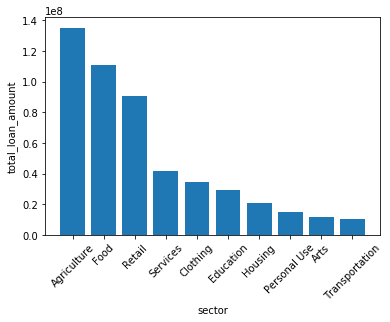

In [42]:
_.bar()

From the above chart we can see that Agricultural loans have the highest total loan amount within the dataset followed by Food and then Retail, which indirctly shows that agriculture is one of the important pillar industries in these realtively low_income countries. Meanwhile, we noticed that the ranking of education and health care is not very high.
We were curious as to what the most common activities within each sector were and so we chose to break each sector down by its most common activities and to display frequency as well as the average loan amount for each activity.

In [43]:
%%sql
Drop table if exists sector_table;
Create table sector_table as 
Select sector,sum(loan_amount) as total_loan_amount from borrower b
Join kiva on b.key =kiva.borrower_key
group by sector
Order by total_loan_amount DESC
limit 10

 * postgresql://student@/Final20
Done.
10 rows affected.


[]

In [44]:
%%sql
Select sector, activity, count(*) as count, round(avg(loan_amount),2) as avg_amount 
from borrower b
Join kiva on b.key =kiva.borrower_key
where sector in
(select sector from
sector_table)
group by activity,sector
order by sector,count desc;

 * postgresql://student@/Final20
138 rows affected.


sector,activity,count,avg_amount
Agriculture,Farming,70969,699.28
Agriculture,Pigs,26374,468.62
Agriculture,Agriculture,22968,1028.70
Agriculture,Livestock,12681,1121.57
Agriculture,Poultry,9401,847.80
Agriculture,Animal Sales,9101,1129.96
Agriculture,Dairy,7747,647.42
Agriculture,Cattle,7656,1010.83
Agriculture,Farm Supplies,4000,791.33
Agriculture,Flowers,797,853.54


How these loans are used seems to vary pretty widely! We saw above that Agriculture was the sector with the largest total loan amount, so to see the most frequent loan activities were Farming, Pigs, Agriculture, and Livestock provided a little more detail. We can venture to say this sector of loans covers general farming costs as well as the cost to handle various animals. Whereas in the Food sector, the majority of the loans go towards Production and Sales and then Fruits and Vegetables. Within Retail, the 3rd largest of the total loan amounts, we see the most common activity is General Store - this sector's activities were perhaps the most vague to us and a more focused text analysis of the tags and/or use variables that we discarded might prove more illuminating.

#### 3.4.2 Business question 2

Where are these loans going and when is the need highest? Find the 10 counties with the largest average loan amount and specify the month with the largest need.




To do this, we started out by looking at the 10 countries with the largest average loan amount. We included a count of loans out of interest, just to see what we were looking at. The count turned out to be somewhat surprising, these countries that had really high averages also had such a small number of loans. 

In [45]:
%%sql
select name, round(AVG(loan_amount),2) as avgloan, count(loan_amount) as totalloans
from country c join kiva on c.key =kiva.country_key
join loaner l on l.key=kiva.loan_key
group by name
order by avgloan desc
limit 10;

 * postgresql://student@/Final20
10 rows affected.


name,avgloan,totalloans
Cote D'Ivoire,50000.00,1
Benin,25150.00,2
Mauritania,15000.00,1
Bhutan,10000.00,1
Chile,8080.56,9
Afghanistan,7000.00,2
Congo,6142.58,128
Puerto Rico,5756.86,51
United States,5146.97,4000
Dominican Republic,4309.21,478


Because of those results, we looked at the average loan amount by the 10 countries that had the most loans. This showed us that some countries receive a lionshare of the loans from this dataset. 

In [46]:
%%sql
select name, round(AVG(loan_amount),2) as avgloan, count(loan_amount) as totalloans
from country c join kiva on c.key =kiva.country_key
join loaner l on l.key=kiva.loan_key
group by name
order by totalloans desc
limit 10;

 * postgresql://student@/Final20
10 rows affected.


name,avgloan,totalloans
Philippines,344.86,160360
Kenya,485.47,67097
Cambodia,569.97,34811
Pakistan,494.92,26853
El Salvador,688.07,24763
Peru,1384.14,22099
Colombia,655.40,21218
Uganda,745.93,20390
Tajikistan,767.01,19498
Ecuador,1108.46,13485


We wanted to find some balance in our business question and so decided to limit the countries of interest to those that received at least 10 loans.

In [47]:
%%sql
select name, round(AVG(loan_amount),2) as avgloan, count(loan_amount) as totalloans
from country c join kiva on c.key =kiva.country_key
join loaner l on l.key=kiva.loan_key
group by name
having count(loan_amount) >= 10
order by avgloan desc
limit 10;

 * postgresql://student@/Final20
10 rows affected.


name,avgloan,totalloans
Congo,6142.58,128
Puerto Rico,5756.86,51
United States,5146.97,4000
Dominican Republic,4309.21,478
Israel,3805.28,180
The Democratic Republic of the Congo,3666.17,3070
Rwanda,3342.95,3250
Saint Vincent and the Grenadines,3076.56,16
Somalia,3011.67,75
Burundi,3008.12,825


In [48]:
%%sql
Drop table if exists countries_table;
Create table countries_table as 
select name, c.key, round(AVG(loan_amount),2) as avgloan
from country c join kiva on c.key =kiva.country_key
join loaner l on l.key=kiva.loan_key
group by name, c.key
having count(loan_amount) >= 10
order by avgloan desc
limit 10;

 * postgresql://student@/Final20
Done.
10 rows affected.


[]

Next we pulled the average loan_amount for each of these ten countries by month. We labeled the rows in order from the highest monthly average to lowest within each country.

In [49]:
%%sql
select c.name
    , l.month_of_year_str as month
    , round(avg(k.loan_amount),2) as avgloan
    , row_number() OVER(PARTITION BY c.name ORDER BY round(avg(k.loan_amount),2) desc) as rownum
    from countries_table as c left join kiva as k on c.key = k.country_key
    left join loaner as l on k.loan_key = l.key
    group by name, month
    order by name, avgloan desc;

 * postgresql://student@/Final20
112 rows affected.


name,month,avgloan,rownum
Burundi,July,3314.22,1
Burundi,December,3277.43,2
Burundi,November,3246.15,3
Burundi,January,3221.35,4
Burundi,June,3062.15,5
Burundi,October,2938.04,6
Burundi,April,2914.81,7
Burundi,February,2875.32,8
Burundi,March,2849.04,9
Burundi,August,2843.75,10


And finally, we extract the month that each country received the highest loan amount on average. This allows us to roughly assess which month the countries that receive the most money overall have the highest loan amounts.

In [50]:
%%sql
select name
, month
, avgloan as month_avg_loan from(
    select c.name
    , l.month_of_year_str as month
    , round(avg(k.loan_amount),2) as avgloan 
    , row_number() OVER(PARTITION BY c.name ORDER BY round(avg(k.loan_amount),2) desc) as rownum
    from countries_table as c left join kiva as k on c.key = k.country_key
    left join loaner as l on k.loan_key = l.key
    group by name, month
    order by name, avgloan desc) as silly
where rownum = 1
order by month_avg_loan desc;

 * postgresql://student@/Final20
10 rows affected.


name,month,month_avg_loan
Puerto Rico,July,9891.67
Somalia,March,8000.00
Congo,September,7296.43
United States,March,5789.60
Dominican Republic,March,5772.22
Israel,February,4665.38
The Democratic Republic of the Congo,October,4492.14
Rwanda,June,4272.82
Saint Vincent and the Grenadines,April,3883.33
Burundi,July,3314.22


In [51]:
%matplotlib inline

<BarContainer object of 10 artists>

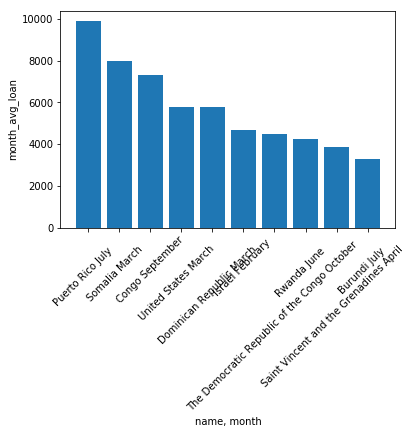

In [52]:
_.bar()

#### 3.4.3 Buisness question 3

In this question, we want to focus on the features of borrowers and specify the difference in loan terms and repayment period between different genders.

First, we want to know the average loan term for female borrowers and male borrowers and borrowers of both genders.

In [45]:
%%sql
select gender_mix, round(avg(term_in_months),1) as avg_term_in_month, count(term_in_months) from borrower b
join kiva on b.key=kiva.borrower_key
group by gender_mix
order by avg_term_in_month desc;

 * postgresql://student@/Final20
3 rows affected.


gender_mix,avg_term_in_month,count
m,16.5,129015
f,13.4,462820
b,9.9,39723


In [54]:
%matplotlib inline

<BarContainer object of 3 artists>

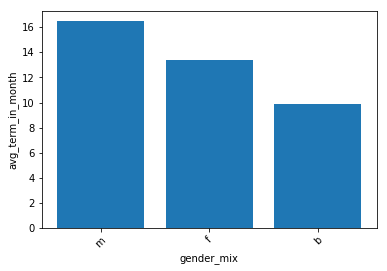

In [55]:
_.bar()

The results show that male debtors have the longest loan terms (16.5 months) and borrowers with both genders have the shortest terms(9.9 months). This is interesting, but, just as interesting is that the vast majority of the borrowers are groups of women. Only a small subset of the loans have both genders listed as borrowers and roughly 20% of the loans are to a man or group of men.

Next we chose to look at the distribution of genders across the repayment intervals: bullet, monthly, irregular, and none. For this look, we decided to look at the raw count of men and women involved. Thus, we expect the results to be higher than the total number of loans in the dataset as each loan was able to multiple borrowers listed. 

In [56]:
%%sql
select repayment_interval,sum(female_count) as total_females, sum(male_count) as total_males
from kiva join loaner on kiva.loan_key=loaner.key
group by cube(repayment_interval)
order by total_females, total_males

 * postgresql://student@/Final20
4 rows affected.


repayment_interval,total_females,total_males
bullet,127812,86673
monthly,420404,124300
irregular,467407,50690
None,1015623,261663


This makes us wonder, what is the average number of men and or women listed as borrowers?

In [49]:
%%sql
select round(avg(female_count),3) as avgwomen
     , round(avg(male_count),3) as avgmen
     , gender_mix
from kiva as k join borrower as b on k.borrower_key = b.key 
group by gender_mix

 * postgresql://student@/Final20
3 rows affected.


avgwomen,avgmen,gender_mix
5.660,3.026,b
0.000,1.097,m
1.709,0.000,f


Overall, the total number of female borrowers is far larger than that of male borrowers. By breaking things out for the average number of each gender on loans, we can see that for loans that have only men, the number of borrowers averages close to just 1, whereas loans to only females average closer to 2 borrowers. The loans going to mixed genders have much higher average numbers with roughly 6 women and 3 men - a near consistent 2:1 ratio for women to men.

So, we can see there are some differences in the number of borrowers by gender as well as in the repayment terms. The next logical question was whether or not sector varied by gender, so we decided to take a look. First we reviewed the top 10 sectors by number of borrowers for men:

In [57]:
%%sql
select sector, sum(male_count) as total_males
from borrower b join kiva on b.key=kiva.borrower_key
group by sector
order by total_males desc
limit 10;

 * postgresql://student@/Final20
10 rows affected.


sector,total_males
Agriculture,109092
Food,37273
Personal Use,29924
Retail,24960
Education,12228
Services,12146
Clothing,7611
Transportation,7568
Housing,7558
Construction,4097


In [58]:
%matplotlib inline

<BarContainer object of 10 artists>

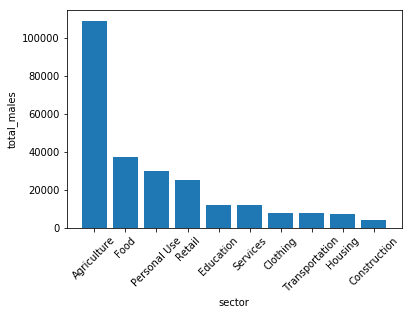

In [59]:
_.bar()

Next, we took the same view but for female only borrowers:

In [60]:
%%sql
select sector, sum(female_count) as total_females
from borrower b join kiva on b.key=kiva.borrower_key
group by sector
order by total_females desc
limit 10;

 * postgresql://student@/Final20
10 rows affected.


sector,total_females
Food,264362
Agriculture,254348
Retail,186610
Clothing,76168
Personal Use,71268
Services,58930
Housing,27797
Education,21710
Arts,20873
Health,10596


In [61]:
%matplotlib inline

<BarContainer object of 10 artists>

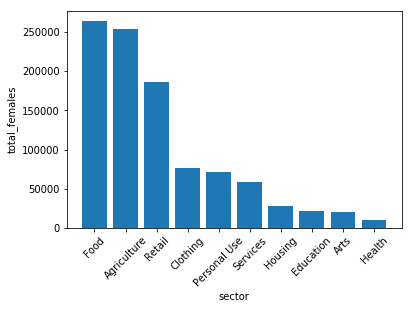

In [62]:
_.bar()

When we compare the top sectors by number of borrowers of each gender we can see some worthwhile distinctions. The top two sectors remain the same although their rank is flipped - with Food having the most female borrowers and Agriculture having the most male borrowers. The distribution drops off much more rapidly for male borrowers, indicating that Agriculture is by far the most popular sector for loans. For female borrowers, the distribution is a little more even for the top three sectors. More women apply for these loans and their top uses vary a little more than male only borrowers. We also found that the sectors that were unique to the top ten for each gender were interesting in their alignment with common societal gender norms. Those industries for women were Arts and Health and for men they were Transportation and Construction.

### _Brief Summary:_

Overall, we were able to make solid progress towards each of our business questions. We saw the common ways the loans are used, which countries have higher average need and when their demand runs hightest, and we about how each the length and repayment terms of loans, the number of borrowers, and the most popular sectors by number of borrowers vary by the genders listed in the borrower decription. Moving forward it would be interesting to model our data and explore further in a manner that allows us to better control for the influence of other variables in each of our assessments.